<div style="border: 1px solid thistle; padding: 5px 20px 10px 20px;">
    <h2><font color = "77658f" style=";"> Feedback</font></h2><br>
    <font color = "77658f">Very well done. Handling of null values, EDA and modeling was very systematic and you explained your process clearly throughout.<br>
        Strong grasp of Python and good use of functions to streamline your code.<br>
        Do try to always add titles and axis labels to your plots.<br>
        Detailed evaluation and conclusion/recommendations.<br>
        You can have a separate folder for your notebooks, especially with multiple notebooks.
     <br>
        <br><b>The Data Science Process</b><br>
        • Problem Statement: <b>2</b><br>
        • Data Cleaning and EDA: <b>3</b> <br>
        • Preprocessing and Modeling: <b>3</b> <br>
        • Evaluation and Conceptual Understanding: <b>3</b><br>
        • Conclusion and Recommendations: <b>3</b><br>
        <br><b>Organization and Professionalism</b><br>
        • Project Organization: <b>3</b><br>
        • Visualisations: <b>2</b><br>
        • Python Syntax and Control Flow: <b>3</b><br> 
        • Presentation: <b>2</b><br>
    </font>
</div>

# Project 2: - Ames Housing Data and Kaggle Challenge
This notebook is Part I of Project 2: - Ames Housing Data and Kaggle Challenge.

## Problem Statement
Using the Ames Housing Dataset, create a regression model to predict the price of a house at sale. The model should not be too complicated and allow for up to 25 features to use for price prediction. With the regression model, potential buyers can estimate the price of a house based on a set of features and not worry if a house is over valued. A property agent can likewise use the model to propose a guide price for the seller based on the features of the house being sold.

> <font size=3 color='blue'> Good attempt. You can also include the metrics the model will be evaluated on i.e. RMSE

## Executive Summary
With a set of data containing 82 different variables for 2930 houses that were sold between 2006 to 2010, a regression model with 25 features was developed after going through data cleaning, exploratory data analysis, feature engineering, pre-processing, model tuning and recursive feature elimination.

Feature selection was done in 3 stages. First, a correlation between sale priceb and features with continuous values was used to drop the features with low correlation. Next, an ElasticNet regularization picked out features which had low coefficients. The remaining features were put through a recursive feature elimination process to pick out the top 25 features that predicts the sale price of a house.

The resulting model enables the user to predict the price of a house by giving details on 12 different areas, such as size of above grade living area, size of basement and overall quality. Other important factors include the neighbourhood that the house is in, the type of house and the age of the house. Accuracy of the model is close to 88%, with an error margin of around $23000.

## Data Dictionary

The data dictionary is available [here](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt).

## Contents:
- [Data Import & Cleaning](#Data-Import-&-Cleaning)
     - [Read in train and test data](#Read-in-train-and-test-data)
     - [Change column names](#Change-column-names)
     - [Group features according to type](#Group-the-features-according-to-types-specified-in-data-dict)
     - [Encode values for ordinal features](#Encode-values-for-ordinal-features-(based-on-data-dictionary-specifications))
     - [Check for null values](#Check-for-null-values-in-train-data)
     - [Check for outliers](#Check-for-outliers-in-train-data)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
    - [Check discrete features](#Check-discrete-features-to-assign-as-ordinal-or-continuous)
    - [Check continuous features](#Check-continuous-features)
    - [Define functions for plotting](#Define-functions-for-plotting)
    - [Check ordinal features](#Check-ordinal-features)
    - [Check nominal features](#Check-nominal-features)
- [Feature Engineering](#Feature-engineering)
- [Pre-processing](#Pre-processing)
    - [One-hot encode](#One-hot-encode-categorical-variables)
- [Continue to modeling](./part2_modeling.ipynb)

In [2]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score

In [3]:
sns.set_style('whitegrid')

In [4]:
# set max display to 100 columns so all columns are shown
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

## Data Import & Cleaning

### Read in train and test data
[Back to Content](#Contents:)

In [5]:
train=pd.read_csv('./datasets/train.csv')
test=pd.read_csv('./datasets/test.csv')

In [6]:
train.shape # total 2051 rows in train data

(2051, 81)

In [7]:
test.shape # total 879 rows in test data, 1 less column than train data which is the saleprice

(879, 80)

In [8]:
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


- Column names have spaces and are title-case, will replace spaces with '_' and lowercase for all
- There are a few columns with null values, will need to check to determine appropriate action needed

### Change column names
[Back to Content](#Contents:)

In [9]:
# set column names to lowercase, replace space with _
train.columns = [x.lower().replace(' ','_') for x in train.columns]
test.columns = [x.lower().replace(' ','_') for x in test.columns]

In [10]:
train.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


### Group the features according to types specified in data dict
[Back to Content](#Contents:)

In [11]:
# Split 77 features into 4 groups for EDA
nominal_list = ['ms_subclass','ms_zoning','street','alley','land_contour',
                'lot_config','neighborhood','condition_1', 'condition_2', 'bldg_type',
               'house_style','roof_style','roof_matl','exterior_1st','exterior_2nd',
               'mas_vnr_type','foundation','heating','central_air','garage_type',
               'garage_finish','sale_type']

ordinal_list = ['lot_shape','utilities','land_slope','overall_qual','overall_cond',
                'exter_qual','exter_cond','bsmt_qual','bsmt_cond','bsmt_exposure',
                'bsmtfin_type_1','bsmtfin_type_2','heating_qc','electrical','kitchen_qual',
                'functional','fireplace_qu','garage_qual','garage_cond','paved_drive',
                'pool_qc','fence']

discrete_list = ['year_built','year_remod/add','bsmt_full_bath','bsmt_half_bath','full_bath',
                 'half_bath','bedroom_abvgr','kitchen_abvgr','totrms_abvgrd','fireplaces',
                 'garage_yr_blt','garage_cars','mo_sold','yr_sold']

continuous_list = ['lot_frontage','lot_area','mas_vnr_area','bsmtfin_sf_1','bsmtfin_sf_2',
                'bsmt_unf_sf','total_bsmt_sf','1st_flr_sf','2nd_flr_sf','low_qual_fin_sf',
                'gr_liv_area','garage_area','wood_deck_sf','open_porch_sf','enclosed_porch',
                '3ssn_porch','screen_porch','pool_area','misc_val']

print(f'Nominal: {len(nominal_list)}\nOrdinal: {len(ordinal_list)}\nDiscrete: {len(discrete_list)}\n\
Continuous: {len(continuous_list)}')

Nominal: 22
Ordinal: 22
Discrete: 14
Continuous: 19


### Encode values for ordinal features (based on data dictionary specifications)
[Back to Content](#Contents:)

In [12]:
# Function to code ordinal features
def code_ordinal(dataset):
    dataset['lot_shape'] = dataset['lot_shape'].map({'Reg':4,'IR1':3,'IR2':2,'IR3':1})
    dataset['utilities'] = dataset['utilities'].map({'AllPub':4,'NoSewr':3,'NoSeWa':2,'ELO':1})
    dataset['land_slope'] = dataset['land_slope'].map({'Gtl':3,'Mod':2,'Sev':1})
    dataset['exter_qual'] = dataset['exter_qual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1})
    dataset['exter_cond'] = dataset['exter_cond'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1})

    # bsmt_qual: replace null with 'NA' before mapping
    dataset['bsmt_qual'].fillna('NA',inplace=True)
    dataset['bsmt_qual'] = dataset['bsmt_qual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1, 'NA':0})

    # bsmt_cond: replace null with 'NA' before mapping
    dataset['bsmt_cond'].fillna('NA',inplace=True)
    dataset['bsmt_cond'] = dataset['bsmt_cond'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1, 'NA':0})

    # bsmt_exposure: replace null with 'NA' before mapping
    dataset['bsmt_exposure'].fillna('NA',inplace=True)
    dataset['bsmt_exposure'] = dataset['bsmt_exposure'].map({'Gd':4,'Av':3,'Mn':2,'No':1,'NA':0})

    # bsmtfin_type_1: replace null with 'NA' before mapping
    dataset['bsmtfin_type_1'].fillna('NA',inplace=True)
    dataset['bsmtfin_type_1'] = dataset['bsmtfin_type_1'].map({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'NA':0})

    # bsmtfin_type_2: replace null with 'NA' before mapping
    dataset['bsmtfin_type_2'].fillna('NA',inplace=True)
    dataset['bsmtfin_type_2'] = dataset['bsmtfin_type_2'].map({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'NA':0})

    dataset['heating_qc'] = dataset['heating_qc'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1})
    dataset['electrical'] = dataset['electrical'].map({'SBrkr':5,'FuseA':4,'FuseF':3,'FuseP':2,'Mix':1})
    dataset['kitchen_qual'] = dataset['kitchen_qual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1})
    dataset['functional'] = dataset['functional'].map({'Typ':8,'Min1':7,'Min2':6,'Mod':5,'Maj1':4, 'Maj2':3,'Sev':2,'Sal':1})

    # fireplace_qu: replace null with 'NA' before mapping
    dataset['fireplace_qu'].fillna('NA',inplace=True)
    dataset['fireplace_qu'] = dataset['fireplace_qu'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1, 'NA':0})

    # garage_finish: replace null with 'NA' before mapping
    dataset['garage_finish'].fillna('NA',inplace=True)
    dataset['garage_finish'] = dataset['garage_finish'].map({'Fin':3,'RFn':2,'Unf':1, 'NA':0})

    # garage_qual: replace null with 'NA' before mapping
    dataset['garage_qual'].fillna('NA',inplace=True)
    dataset['garage_qual'] = dataset['garage_qual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1, 'NA':0})

    # garage_cond: replace null with 'NA' before mapping
    dataset['garage_cond'].fillna('NA',inplace=True)
    dataset['garage_cond'] = dataset['garage_cond'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1, 'NA':0})

    dataset['paved_drive'] = dataset['paved_drive'].map({'Y':3,'N':2,'P':1})

    # pool_qc: replace null with 'NA' before mapping
    dataset['pool_qc'].fillna('NA',inplace=True)
    dataset['pool_qc'] = dataset['pool_qc'].map({'Ex':4,'Gd':3,'TA':2,'Fa':1,'NA':0})

    # fence: replace null with 'NA' before mapping
    dataset['fence'].fillna('NA',inplace=True)
    dataset['fence'] = dataset['fence'].map({'GdPrv':4,'MnPrv':3,'GdWo':2,'MnWw':1,'NA':0})

In [13]:
# encode for train data
code_ordinal(train)

# encode for test data
code_ordinal(test)

In [14]:
# check that encoding was done successfully for train data
train.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,3,Lvl,4,CulDSac,3,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,4,3,CBlock,3,3,1,6,533.0,1,0.0,192.0,725.0,GasA,5,Y,5,725,754,0,1479,0.0,0.0,2,1,3,1,4,6,8,0,0,Attchd,1976.0,2,2.0,475.0,3,3,3,0,44,0,0,0,0,0,0,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,3,Lvl,4,CulDSac,3,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,4,3,PConc,4,3,1,6,637.0,1,0.0,276.0,913.0,GasA,5,Y,5,913,1209,0,2122,1.0,0.0,2,1,4,1,4,8,8,1,3,Attchd,1997.0,2,2.0,559.0,3,3,3,0,74,0,0,0,0,0,0,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,4,Lvl,4,Inside,3,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,4,CBlock,3,3,1,6,731.0,1,0.0,326.0,1057.0,GasA,3,Y,5,1057,0,0,1057,1.0,0.0,1,0,3,1,4,5,8,0,0,Detchd,1953.0,1,1.0,246.0,3,3,3,0,52,0,0,0,0,0,0,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,4,Lvl,4,Inside,3,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,3,PConc,4,3,1,1,0.0,1,0.0,384.0,384.0,GasA,4,Y,5,744,700,0,1444,0.0,0.0,2,1,3,1,3,7,8,0,0,BuiltIn,2007.0,3,2.0,400.0,3,3,3,100,0,0,0,0,0,0,0,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,3,Lvl,4,Inside,3,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,3,3,PConc,2,4,1,1,0.0,1,0.0,676.0,676.0,GasA,3,Y,5,831,614,0,1445,0.0,0.0,2,0,3,1,3,6,8,0,0,Detchd,1957.0,1,2.0,484.0,3,3,2,0,59,0,0,0,0,0,0,NaN,0,3,2010,WD,138500


In [15]:
# check that encoding was done successfully for test data
test.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,4,Lvl,4,Inside,3,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,3,2,Stone,2,3,1,1,0,1,0,1020,1020,GasA,4,N,2.0,908,1020,0,1928,0,0,2,0,4,2,2,9,8,0,0,Detchd,1910.0,1,1,440,1,1,3,0,60,112,0,0,0,0,0,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,3,Lvl,4,Inside,3,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,3,3,CBlock,4,3,1,1,0,1,0,1967,1967,GasA,3,Y,5.0,1967,0,0,1967,0,0,2,0,6,2,3,10,8,0,0,Attchd,1977.0,3,2,580,3,3,3,170,0,0,0,0,0,0,0,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,3,Lvl,4,Inside,3,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,4,3,PConc,4,4,3,6,554,1,0,100,654,GasA,5,Y,5.0,664,832,0,1496,1,0,2,1,3,1,4,7,8,1,4,Attchd,2006.0,2,2,426,3,3,3,100,24,0,0,0,0,0,0,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,4,Lvl,4,Inside,3,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,4,3,CBlock,3,3,1,1,0,1,0,968,968,GasA,3,Y,5.0,968,0,0,968,0,0,1,0,2,1,3,5,8,0,0,Detchd,1935.0,1,2,480,2,3,2,0,0,184,0,0,0,0,0,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,3,Lvl,4,Inside,3,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,3,3,CBlock,4,3,1,4,609,1,0,785,1394,GasA,4,Y,5.0,1394,0,0,1394,1,0,1,1,3,1,3,6,8,2,4,Attchd,1963.0,2,2,514,3,3,3,0,76,0,0,185,0,0,0,NaN,0,7,2009,WD


> <font size=3 color='blue'> Do indicate how you decided which columns to impute with "NA"

### Check for null values in train data
[Back to Content](#Contents:)

In [16]:
train.isnull().sum()

id                    0
pid                   0
ms_subclass           0
ms_zoning             0
lot_frontage        330
lot_area              0
street                0
alley              1911
lot_shape             0
land_contour          0
utilities             0
lot_config            0
land_slope            0
neighborhood          0
condition_1           0
condition_2           0
bldg_type             0
house_style           0
overall_qual          0
overall_cond          0
year_built            0
year_remod/add        0
roof_style            0
roof_matl             0
exterior_1st          0
exterior_2nd          0
mas_vnr_type         22
mas_vnr_area         22
exter_qual            0
exter_cond            0
foundation            0
bsmt_qual             0
bsmt_cond             0
bsmt_exposure         0
bsmtfin_type_1        0
bsmtfin_sf_1          1
bsmtfin_type_2        0
bsmtfin_sf_2          1
bsmt_unf_sf           1
total_bsmt_sf         1
heating               0
heating_qc      

In [17]:
# How many percent of 'alley' is missing
train['alley'].isnull().sum()/train.shape[0]

0.931740614334471

- 93% of `alley` has null values, to be dropped since majority of houses do not have alleys and this feature will not be a good predictor of `saleprice`

In [18]:
# How many percent of 'misc_feature' is missing
train['misc_feature'].isnull().sum()/train.shape[0]

0.9683081423695759

- Almost 97% of `misc_feature` is missing. This feature to be dropped as it will not be a good predictor of `saleprice`

#### Summary findings from null value checks
1. `lot_frontage` has 305 missing values, fill with 0 since these properties do not have any frontage
2. `alley` has 1814 missing values, 93% of dataset, will drop this feature
3. `mas_vnr_type` and `mas_vnr_area` has 20 missing values, fill `mas_vnr_type` with 'None' and `mas_vnr_area` with 0
4. `bsmtfin_sf_1`,`bsmtfin_sf_2`,`bsmt_unf_sf` and `total_bsmt_sf` has 1 missing value each, check if it's from the same house
5. `bsmt_full_bath` and `bsmt_half_bath` has 2 missing values,  
6. `garage_type` and `garage_yr_blt` has 114 missing values, fill `garage_type` with 'NA', `garage_yr_blt` with `year_built`
7. `garage_cars` and `garage_area` has 1 missing value, drop this row
8. `misc_feature` has 1892 missing values, 97% of dataset, drop this feature

#### Replace null values for items 1, 2, 3 and 5 from above [summary](#Summary-findings-from-null-value-checks)

In [19]:
# Define function to replace null values
def replace_nulls(dataset):
    dataset['lot_frontage'].fillna(0,inplace=True) # fill missing with 0
    dataset['mas_vnr_type'].fillna('None',inplace=True) # fill missing with 'None'
    dataset['mas_vnr_area'].fillna(0,inplace=True) # fill missing with 0
    dataset['garage_type'].fillna('NA',inplace=True) # fill missing with 'NA'
    dataset['garage_yr_blt'].fillna(dataset['year_built'],inplace=True) # fill missing with 'NA'

In [20]:
# replace nullls in train data
replace_nulls(train)

In [21]:
# apply the same to test data
replace_nulls(test)

#### Which house has missing basement values? - item 4 in above [summary](#Summary-findings-from-null-value-checks)

In [22]:
# list rows with null value in bsmtfin_sf_1 
train[train['bsmtfin_sf_1'].isnull()]
# index 1327 is the house with missing basement values, drop this row

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
1327,1342,903230120,20,RM,99.0,5940,Pave,NaN,3,Lvl,4,FR3,3,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,3,3,PConc,0,0,0,0,NaN,0,NaN,NaN,NaN,GasA,3,Y,4,896,0,0,896,NaN,NaN,1,0,2,1,3,4,8,0,0,Detchd,1946.0,1,1.0,280.0,3,3,3,0,0,0,0,0,0,0,3,NaN,0,4,2008,ConLD,79000


- Since its only 1 row, drop house with null values for basement features from train dataset, i.e. row 1327.

In [23]:
# since its only 1 row, drop house with null values for basement features from train dataset
train.drop(1327,inplace=True)

#### Which 2 houses have missing values for bsmt_full_bath and bsmt_half_bath - item 5 in above [summary](#Summary-findings-from-null-value-checks)

In [24]:
train[(train['bsmt_full_bath'].isnull()) | (train['bsmt_half_bath'].isnull())]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
616,1498,908154080,20,RL,123.0,47007,Pave,NaN,3,Lvl,4,Inside,3,Edwards,Norm,Norm,1Fam,1Story,5,7,1959,1996,Gable,CompShg,Plywood,Plywood,None,0.0,3,3,Slab,0,0,0,0,0.0,0,0.0,0.0,0.0,GasA,3,Y,5,3820,0,0,3820,NaN,NaN,3,1,5,1,5,11,8,2,4,Attchd,1959.0,1,2.0,624.0,3,3,3,0,372,0,0,0,0,0,0,NaN,0,7,2008,WD,284700


- Only 1 row instead of 2. The other house was already dropped from previous step with the missing basement details.
- Drop this row as well since there is only 1 row and removing it will not impact on the modeling results.

In [25]:
# since its only 1 row, drop house with null values for basement bath features from train dataset
train.drop(616,inplace=True)

#### Which house has missing values for garage_cars and garage_area?  - item 7 in above [summary](#Summary-findings-from-null-value-checks)

In [26]:
# list rows with null value in garage_cars
train[train['garage_cars'].isnull()]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
1712,2237,910201180,70,RM,50.0,9060,Pave,NaN,4,Lvl,4,Inside,3,IDOTRR,Norm,Norm,1Fam,2Story,5,6,1923,1999,Gable,CompShg,Wd Sdng,Plywood,None,0.0,3,3,BrkTil,4,3,1,5,548.0,1,0.0,311.0,859.0,GasA,5,Y,5,942,886,0,1828,0.0,0.0,2,0,3,1,4,6,8,0,0,Detchd,1923.0,0,NaN,NaN,0,0,3,174,0,212,0,0,0,0,3,NaN,0,3,2007,WD,150909


- Since its only 1 row, drop house with null values for garade_cars and garage_area from train dataset, i.e. row 1712.

In [27]:
train.drop(1712,inplace=True)

#### Add `alley` and `misc_feature` to droplist - items 2 & 8 in above [summary](#Summary-findings-from-null-value-checks)

In [28]:
# Create a list to track the features that will be dropped from the modelling
droplist = []

In [29]:
# add misc_feature to drop list
droplist.extend(['alley','misc_feature'])

#### Validate changes

In [30]:
train.isnull().sum()

id                    0
pid                   0
ms_subclass           0
ms_zoning             0
lot_frontage          0
lot_area              0
street                0
alley              1908
lot_shape             0
land_contour          0
utilities             0
lot_config            0
land_slope            0
neighborhood          0
condition_1           0
condition_2           0
bldg_type             0
house_style           0
overall_qual          0
overall_cond          0
year_built            0
year_remod/add        0
roof_style            0
roof_matl             0
exterior_1st          0
exterior_2nd          0
mas_vnr_type          0
mas_vnr_area          0
exter_qual            0
exter_cond            0
foundation            0
bsmt_qual             0
bsmt_cond             0
bsmt_exposure         0
bsmtfin_type_1        0
bsmtfin_sf_1          0
bsmtfin_type_2        0
bsmtfin_sf_2          0
bsmt_unf_sf           0
total_bsmt_sf         0
heating               0
heating_qc      

In [31]:
droplist

['alley', 'misc_feature']

- All null values have been filled in
- `alley` and `misc_feature` have been added to the droplist.

#### Check `test` data if any nulls remaining

In [32]:
test.isnull().sum()

id                   0
pid                  0
ms_subclass          0
ms_zoning            0
lot_frontage         0
lot_area             0
street               0
alley              821
lot_shape            0
land_contour         0
utilities            0
lot_config           0
land_slope           0
neighborhood         0
condition_1          0
condition_2          0
bldg_type            0
house_style          0
overall_qual         0
overall_cond         0
year_built           0
year_remod/add       0
roof_style           0
roof_matl            0
exterior_1st         0
exterior_2nd         0
mas_vnr_type         0
mas_vnr_area         0
exter_qual           0
exter_cond           0
foundation           0
bsmt_qual            0
bsmt_cond            0
bsmt_exposure        0
bsmtfin_type_1       0
bsmtfin_sf_1         0
bsmtfin_type_2       0
bsmtfin_sf_2         0
bsmt_unf_sf          0
total_bsmt_sf        0
heating              0
heating_qc           0
central_air          0
electrical 

- There is 1 row with null value in `electrical` column, rows cannot be dropped from test data as Kaggle submit requires all rows to be included. What value should we replace null with?

In [33]:
# Check row with missing data for electrical, what should the null value be replaced with
test[test['electrical'].isnull()]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type
635,1578,916386080,80,RL,73.0,9735,Pave,NaN,4,Lvl,4,Inside,3,Timber,Norm,Norm,1Fam,SLvl,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,3,PConc,4,3,1,1,0,1,0,384,384,GasA,4,Y,NaN,754,640,0,1394,0,0,2,1,3,1,4,7,8,0,0,BuiltIn,2007.0,3,2,400,3,3,3,100,0,0,0,0,0,0,0,NaN,0,5,2008,WD


In [34]:
# No clear indication of what it should be, replace with 'Sbrkr'(value 5), most common value in Train dataset
train['electrical'].value_counts(normalize=True)

5    0.911133
4    0.067871
3    0.017090
2    0.003418
1    0.000488
Name: electrical, dtype: float64

- There is no deducible value from other features that would suggest what the value for `electrical` could be. Mode value can be used to fill in for this row since 91% of houses have the same value.

In [35]:
# replace missing in 'electrical' with most common value
test['electrical'].fillna(test['electrical'].mode(), inplace=True)

**All null values have now been filled in or excluded from the modeling feature list.**


**Next, we check if there are outliers in the data.**

### Check for outliers in train data
[Back to Content](#Contents:)

#### Examine `saleprice`

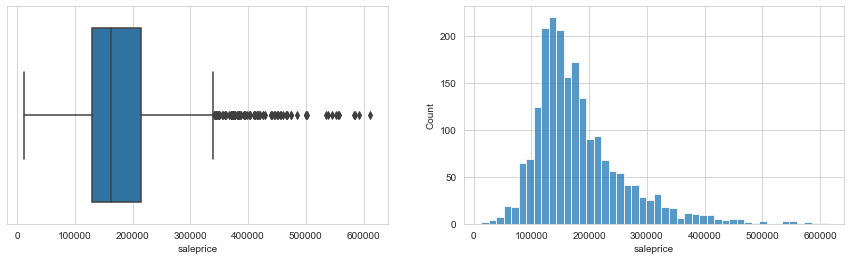

In [36]:
# since this is the y value, it is important to check the distribution of saleprice.
fig, ax = plt.subplots(ncols=2, figsize=(15,4))
sns.boxplot(data=train, x='saleprice', ax=ax[0]);
sns.histplot(data=train, x='saleprice', ax=ax[1]);

1. Looks like there are quite a number of outliers and the histogram looks slightly right-skewed.
2. Check saleprice at 98th percentile, consider to remove since this is <5% of data. This top 2% of data which are outliers as shown in the boxplot will add noise during the modeling, so its better to remove them.

In [37]:
# What is the saleprice at 98th percentile?
train['saleprice'].quantile(0.98)

410000.0

In [38]:
# How many percent of saleprice is above 400000?
(train['saleprice']>400000).sum()/train.shape[0]

0.0224609375

In [39]:
# Drop all saleprice above 400000, which is about 2.2% of data to reduce noise
train = train[train['saleprice']<=400000]
train.shape

(2002, 81)

#### Examine `gr_liv_area`
- This feature was the top feature after the modeling process, remove outliers for this feature to reduce noise

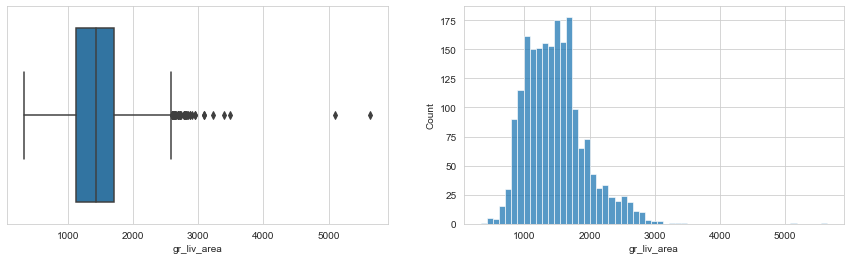

In [40]:
# see the distribution for gr_liv_area
fig, ax = plt.subplots(ncols=2, figsize=(15,4))
sns.boxplot(data=train, x='gr_liv_area', ax=ax[0]);
sns.histplot(data=train, x='gr_liv_area', ax=ax[1]);

There are quite a number of outliers for above ground living area. Histogram looks slightly right-skewed. Similar to saleprice, check 98th percentile, consider to remove to reduce noise.

In [41]:
# What's the lot_area at 98th percentile
train['gr_liv_area'].quantile(0.98)

2629.88

In [42]:
# How many percent of lot_area is above 2600?
(train['gr_liv_area']>2600).sum()/train.shape[0]

0.023476523476523476

In [43]:
# Drop all gr_liv_area above 2600, which is about 1% of data to reduce noise
train = train[train['gr_liv_area']<=2600]
train.shape

(1955, 81)

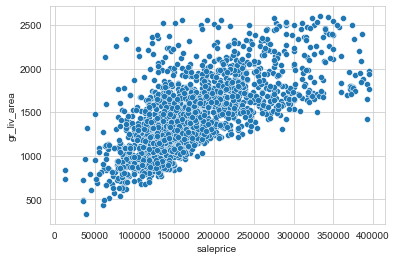

In [44]:
sns.scatterplot(data=train, x='saleprice', y='gr_liv_area'); # data looks well distributed

- There is a clear positive linear relationship between `saleprice` and `gr_liv_area`

#### Check histogram for `saleprice` and `gr_liv_area`

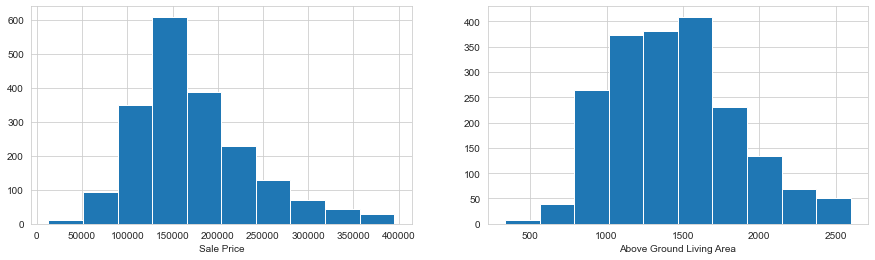

In [45]:
fig, ax = plt.subplots(ncols=2, figsize=(15,4))
ax[0].hist(train['saleprice']); # data is slightly right skewed
ax[0].set(xlabel='Sale Price');
ax[1].hist(train['gr_liv_area']); # data looks normally distributed
ax[1].set(xlabel='Above Ground Living Area');

- Both distributions looks more normal, with less skew.

In [46]:
train.shape, droplist

((1955, 81), ['alley', 'misc_feature'])

**After some data cleaning, we have 1955 rows of data left in train dataset, and 2 features have been identified to be dropped from the model.**

## Exploratory Data Analysis
[Back to Content](#Contents:)

### Check discrete features to assign as ordinal, nominal or continuous
[Back to Content](#Contents:)

In [47]:
train[discrete_list].head()

,year_built,year_remod/add,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,totrms_abvgrd,fireplaces,garage_yr_blt,garage_cars,mo_sold,yr_sold
0,1976,2005,0.0,0.0,2,1,3,1,6,0,1976.0,2.0,3,2010
1,1996,1997,1.0,0.0,2,1,4,1,8,1,1997.0,2.0,4,2009
2,1953,2007,1.0,0.0,1,0,3,1,5,0,1953.0,1.0,1,2010
3,2006,2007,0.0,0.0,2,1,3,1,7,0,2007.0,2.0,4,2010
4,1900,1993,0.0,0.0,2,0,3,1,6,0,1957.0,2.0,3,2010


In [48]:
train[discrete_list].describe()

,year_built,year_remod/add,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,totrms_abvgrd,fireplaces,garage_yr_blt,garage_cars,mo_sold,yr_sold
count,1955.000000,1955.000000,1955.000000,1955.000000,1955.000000,1955.000000,1955.000000,1955.000000,1955.000000,1955.000000,1955.000000,1955.000000,1955.000000,1955.000000
mean,1970.992839,1983.547315,0.413299,0.062916,1.546292,0.348338,2.807673,1.042455,6.292072,0.556522,1975.940153,1.732992,6.209719,2007.779540
std,29.991707,21.145453,0.515896,0.249114,0.532736,0.490327,0.791357,0.209151,1.399339,0.616435,27.129810,0.740903,2.752501,1.317153
min,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1872.000000,0.000000,1.000000,2006.000000
25%,1953.000000,1963.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1958.000000,1.000000,4.000000,2007.000000
50%,1972.000000,1992.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,0.000000,1977.000000,2.000000,6.000000,2008.000000
75%,2000.000000,2003.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,8.000000,2009.000000
max,2010.000000,2010.000000,3.000000,2.000000,3.000000,2.000000,6.000000,3.000000,13.000000,3.000000,2207.000000,5.000000,12.000000,2010.000000


#### Summary of actions for discrete features
1. There are 4 features with year type data. 3 of these can be recoded by taking the difference from the year sold to show the age of the feature when the property was sold. These 3 features can then be added to the list of continuous features for EDA.


    a. age_built: year sold - year_built 
    b. age_remod: year sold - year_remod/add
    c. age_garage: year sold - garage_yr_blt
    
   
2. mo_sold can be added to the nominal feature list for further checks.


3. bsmt_full_bath and bsmt_half_bath can be combined into bsmt_bath with a ratio of 2:1 taking 2 from full_bath and 1 from half_bath values.


4. Similarly for full_bath and half_bath, these two to be combined into bath with a ratio of 2:1 taking 2 from full_bath and 1 from half_bath values.


5. Rest of features can be added to ordinal list for further checks.


    a. bedroom_abvgr
    b. kitchen_abvgr
    c. totrms_abvgrd 
    d. fireplaces 
    e. garage_cars 

#### Create new features (item 1 from above [summary](#Summary-of-actions-for-discrete-features))

In [49]:
# year_built can be calculated against yr_sold as age_built and 
# year_remod/add can be calculated against yr_sold as age_remod
# garage_yr_blt can be calculated against yr_sold as age_garage
# add 1 so that minimum age will be 1 and not 0.
train['age_built'] = train['yr_sold'] - train['year_built'] + 1
train['age_remod'] = train['yr_sold'] - train['year_remod/add'] + 1
train['age_garage'] = train['yr_sold'] - train['garage_yr_blt'] + 1

In [50]:
# do the same for test dataset
test['age_built'] = test['yr_sold'] - test['year_built'] + 1
test['age_remod'] = test['yr_sold'] - test['year_remod/add'] + 1
test['age_garage'] = test['yr_sold'] - test['garage_yr_blt'] + 1

- Year values for `year_built`, `year_remod/add` and `garage_yr_blt` have been converted to age and is now more intuitive for further analysis.


- All 3 new features to be added to continuous list and the old features to be dropped.

In [51]:
# include the new features in continuous list
continuous_list.extend(['age_built','age_remod', 'age_garage'])

In [52]:
# drop the old features year_built, year_remod/add and yr_sold
droplist.extend(['year_built','year_remod/add','garage_yr_blt','yr_sold'])

#### Add mo_sold to nominal list (item 2 from above [summary](#Summary-of-actions-for-discrete-features))

In [53]:
nominal_list.append('mo_sold')

#### Combine full bath and half bath features (items 3 & 4 from above [summary](#Summary-of-actions-for-discrete-features))

Create the new bath features.

In [54]:
# use a function to create total baths for train and test data
def create_bath(data):
    # for baths in basement
    data['bsmt_bath'] = data['bsmt_full_bath'] * 2 + data['bsmt_half_bath']
    
    # for baths above grade
    data['bath'] = data['full_bath'] * 2 + data['half_bath']

In [55]:
# create new bath features for train data
create_bath(train)

# create new bath features for test data
create_bath(test)

New bath features created.

Now, remove the old features.

In [56]:
# drop the old features year_built, year_remod/add and yr_sold
droplist.extend(['bsmt_full_bath','bsmt_half_bath','full_bath','half_bath'])

#### Add rest of features to ordinal list (item 5 from above [summary](#Summary-of-actions-for-discrete-features))

In [57]:
# drop the old features year_built, year_remod/add and yr_sold
ordinal_list.extend(['bedroom_abvgr', 'kitchen_abvgr', 'totrms_abvgrd', 'fireplaces', 'garage_cars'])

### Check continuous features
[Back to Content](#Contents:)

In [58]:
len(continuous_list)

22

Total of 22 continuous features to explore.

Add `saleprice` to list of continuous features for heatmap.

In [59]:
# add 'saleprice' to continuous list
continuous_list_corr = continuous_list + ['saleprice']

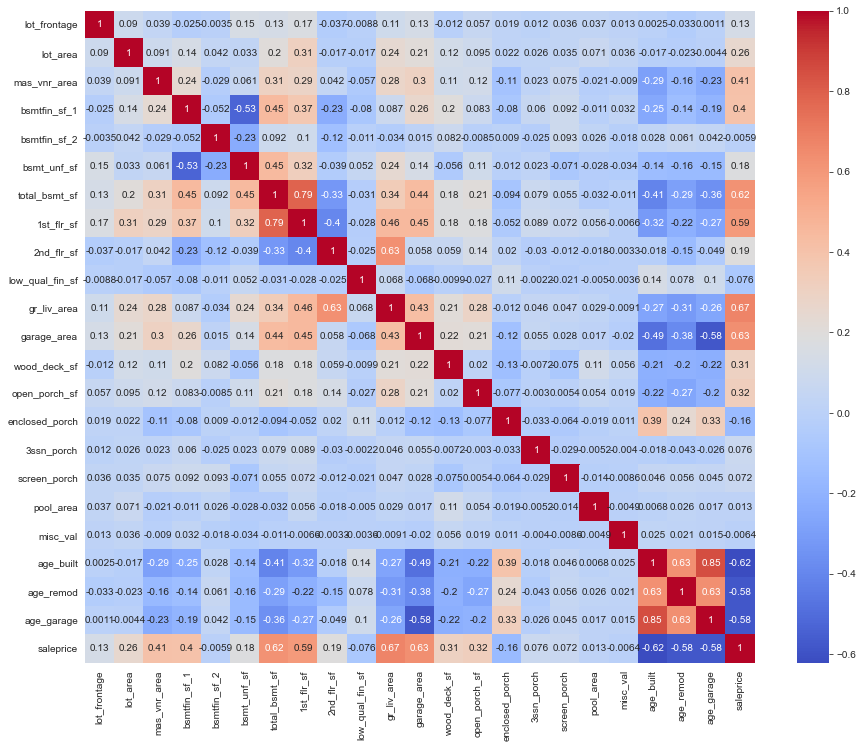

In [60]:
# use correlation values to check for features to drop
plt.figure(figsize=(15,12))
cmap = 'coolwarm'
# mask = np.triu(train[continuous_list_corr].corr())
sns.heatmap(train[continuous_list_corr].corr(), annot=True, cmap=cmap);

#### Some observations:
- There are a few features which are highly correlated with saleprice


- There is collinearity between these features:
    1. `total_bsmt_sf` and `1st_flr_sf` at 0.79.
    2. `gr_liv_area` and `2nd_flr_sf` at 0.63.
    3. `age_built` and `age_garage` at 0.85.
    4. `age_built` and `age_remod` at 0.63.
    5. `garage_area` and `age_garage` at -0.58.

#### Check for correlation with saleprice

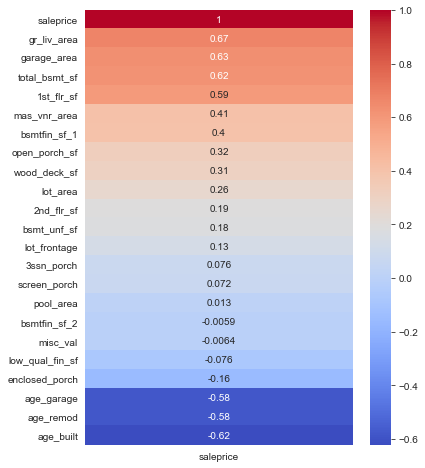

In [61]:
# Check correlation with saleprice
plt.figure(figsize=(6,8))
sns.heatmap(train[continuous_list_corr].corr()[['saleprice']].sort_values('saleprice', ascending=False),
            annot=True, cmap=cmap);

#### Summary of actions for continuous features
1. Majority of absolute correlation of continuous features with saleprice are below 0.5. These features can be dropped.


2. Total of 7 features with absolute correlation coefficient >0.5. Check these for collinearity amongst the features.

#### Drop features with <0.5 correlation coefficient (item 1 from above [summary](#Summary-of-actions-for-continuous-features))

In [62]:
# get absolute correlation with saleprice
corr = train[continuous_list_corr].corr()[['saleprice']]
corr_drop = abs(corr["saleprice"])

# select poorly correlated features
drop_features = corr_drop[corr_drop<0.5]

print(len(drop_features))
drop_features.index.values

15


array(['lot_frontage', 'lot_area', 'mas_vnr_area', 'bsmtfin_sf_1',
       'bsmtfin_sf_2', 'bsmt_unf_sf', '2nd_flr_sf', 'low_qual_fin_sf',
       'wood_deck_sf', 'open_porch_sf', 'enclosed_porch', '3ssn_porch',
       'screen_porch', 'pool_area', 'misc_val'], dtype=object)

- These 15 out of 22 continuous features are poorly correlated to saleprice, drop them.

In [63]:
# add to droplist
droplist.extend(drop_features.index.values)

15 more features dropped.

#### With the remaining 7 features, check for multi-collinearity (item 2 from above [summary](#Summary-of-actions-for-continuous-features))

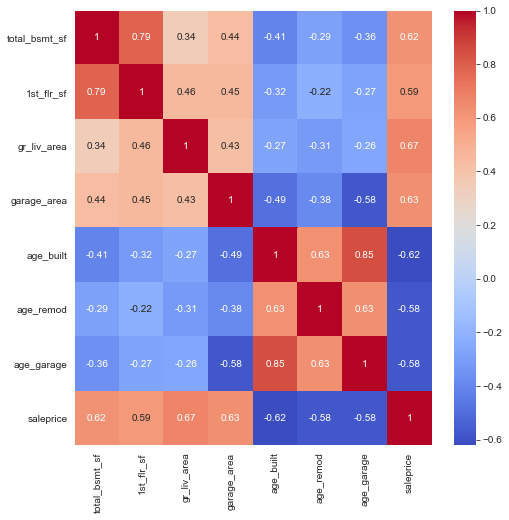

In [64]:
# check collinearity amongst the remaining features
plt.figure(figsize=(8,8))
continuous_list_corr = [x for x in continuous_list_corr if x not in droplist]

sns.heatmap(train[continuous_list_corr].corr(), annot=True, cmap=cmap);

Observations:
- `1st_flr_sf` and `total_bsmt_sf` are highly correlated. Drop `1st_flr_sf` since `total_bsmt_sf` has higher correlation with `saleprice`


- `garage_area` and `age_garage` are highly correlated. Drop `age_garage` since `garage_area` has higher absolute correlation with `saleprice`.


- `age_built` is highly correlated with `age_remod` and `age_garage`. `age_garage` has been dropped in the previous observation. Drop `age_remod` since `age_built` has higher absolute correlation with saleprice.

In [65]:
# add to droplist
droplist.extend(['1st_flr_sf','age_garage','age_remod'])

3 more features dropped.

### Define function for plotting
[Back to Content](#Contents:)


For the purpose of exploring ordinal and nominal features, these functions have been created to help generate barplots and boxplots for each feature.

In [66]:
def mixplotter(features):
    # one row per feature
    nrows = len(features);
    plt.subplots_adjust(hspace=0.7);
    
    # there will be 2 plots per feature
    fig, ax=plt.subplots(nrows=nrows, ncols=2, figsize=(15,nrows*4));
    
    # change ax into 1-dim for easier reference
    ax = ax.ravel();
    
    # left shows the bar plot, right shows the boxplot
    for i, feature in enumerate(features):
        idx = (i-1)*2;
        train[feature].value_counts(normalize=True).plot.bar(ax=ax[idx]);
        ax[idx].set(title=feature, ylabel='Percent of total', xlabel='', ylim=(0,1));
        sns.boxplot(y='saleprice', x=feature, data=train, ax=ax[idx+1]);
        ax[idx+1].set(title=feature, xlabel='');

In [67]:
len(ordinal_list)

27

Total of 27 ordinal features to explore.

Let's look at barplots and boxplots for 9 features at a time.

### Check ordinal features
[Back to Content](#Contents:)

#### Check ordinal features 1-9

<Figure size 432x288 with 0 Axes>

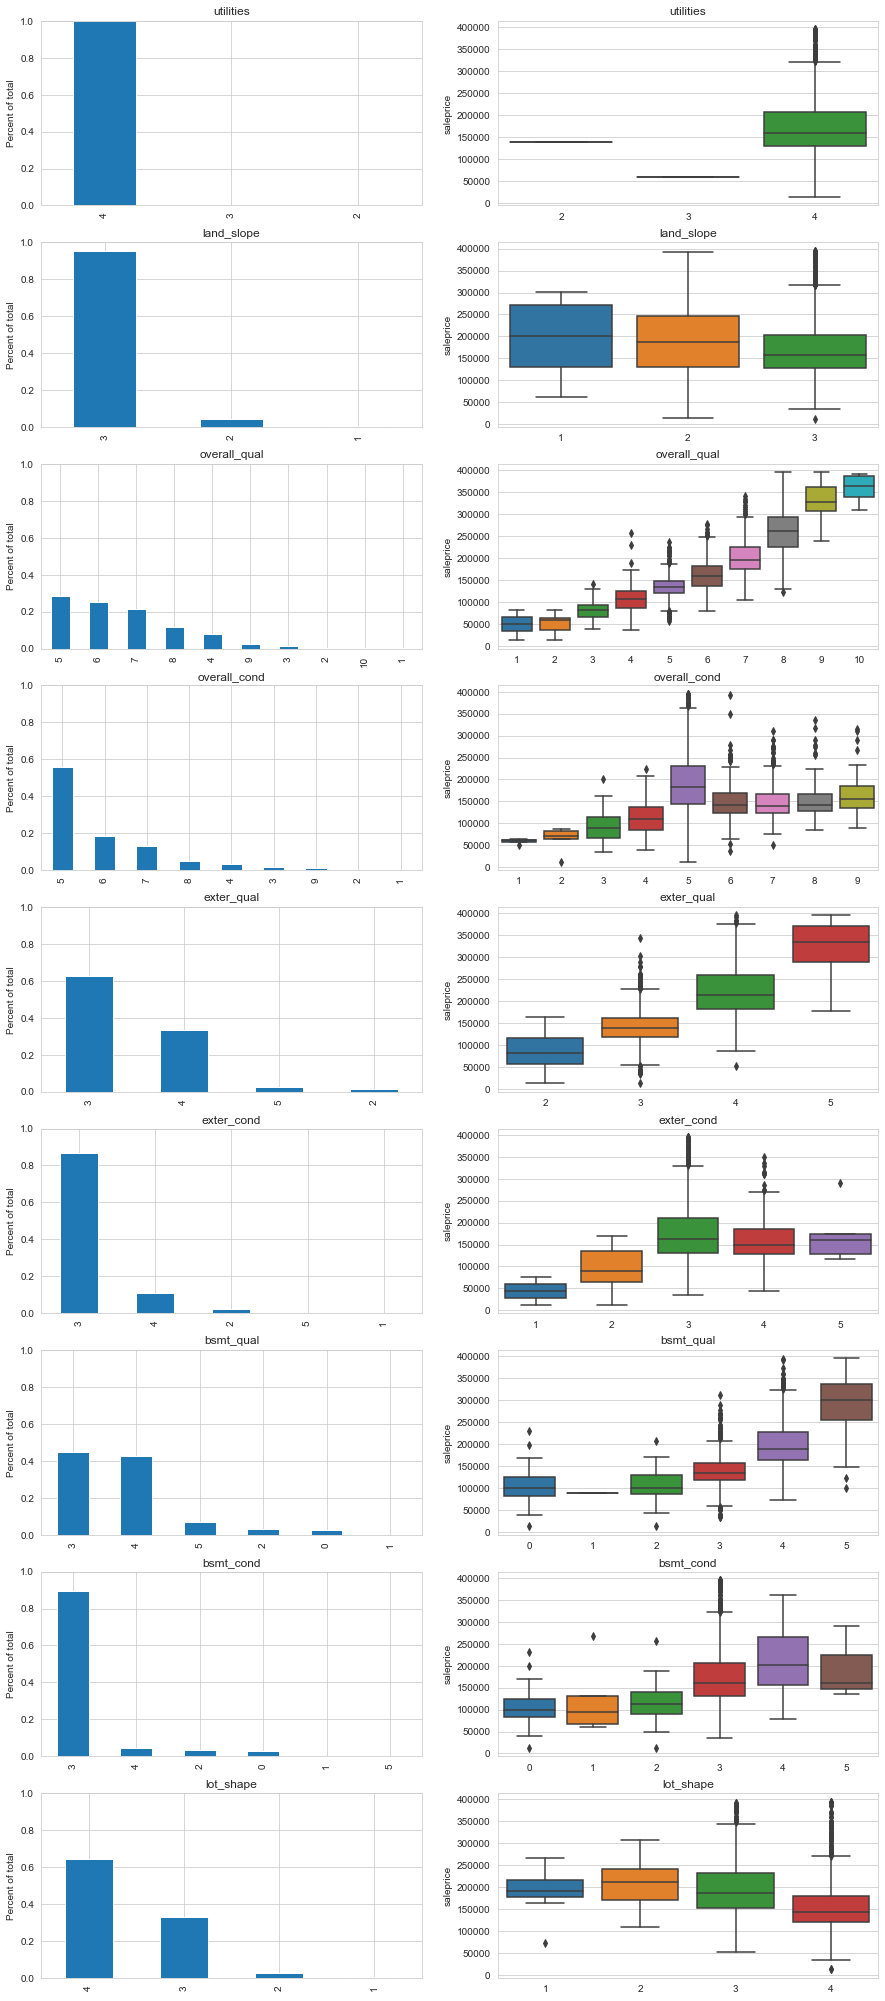

In [68]:
# Check features 1-9
mixplotter(ordinal_list[:9]);

> <font size=3 color='blue'> You could customise the countplot and boxplot graph titles for each here. Also, it might be easier to compare the graphs if the x-axis has them in the same order.

- Majority (>80%) of values for `utilities`, `land_slope`, `exter_cond` and `bsmt_cond` fall under one code, these features will not be good predictors of saleprice.


- Drop these ordinal features:


    a. utilities
    b. land_slope
    c. exter_cond
    d. bsmt_cond

In [69]:
# add to droplist
droplist.extend(['utilities', 'land_slope', 'exter_cond', 'bsmt_cond'])

#### Check ordinal features 10-18

<Figure size 432x288 with 0 Axes>

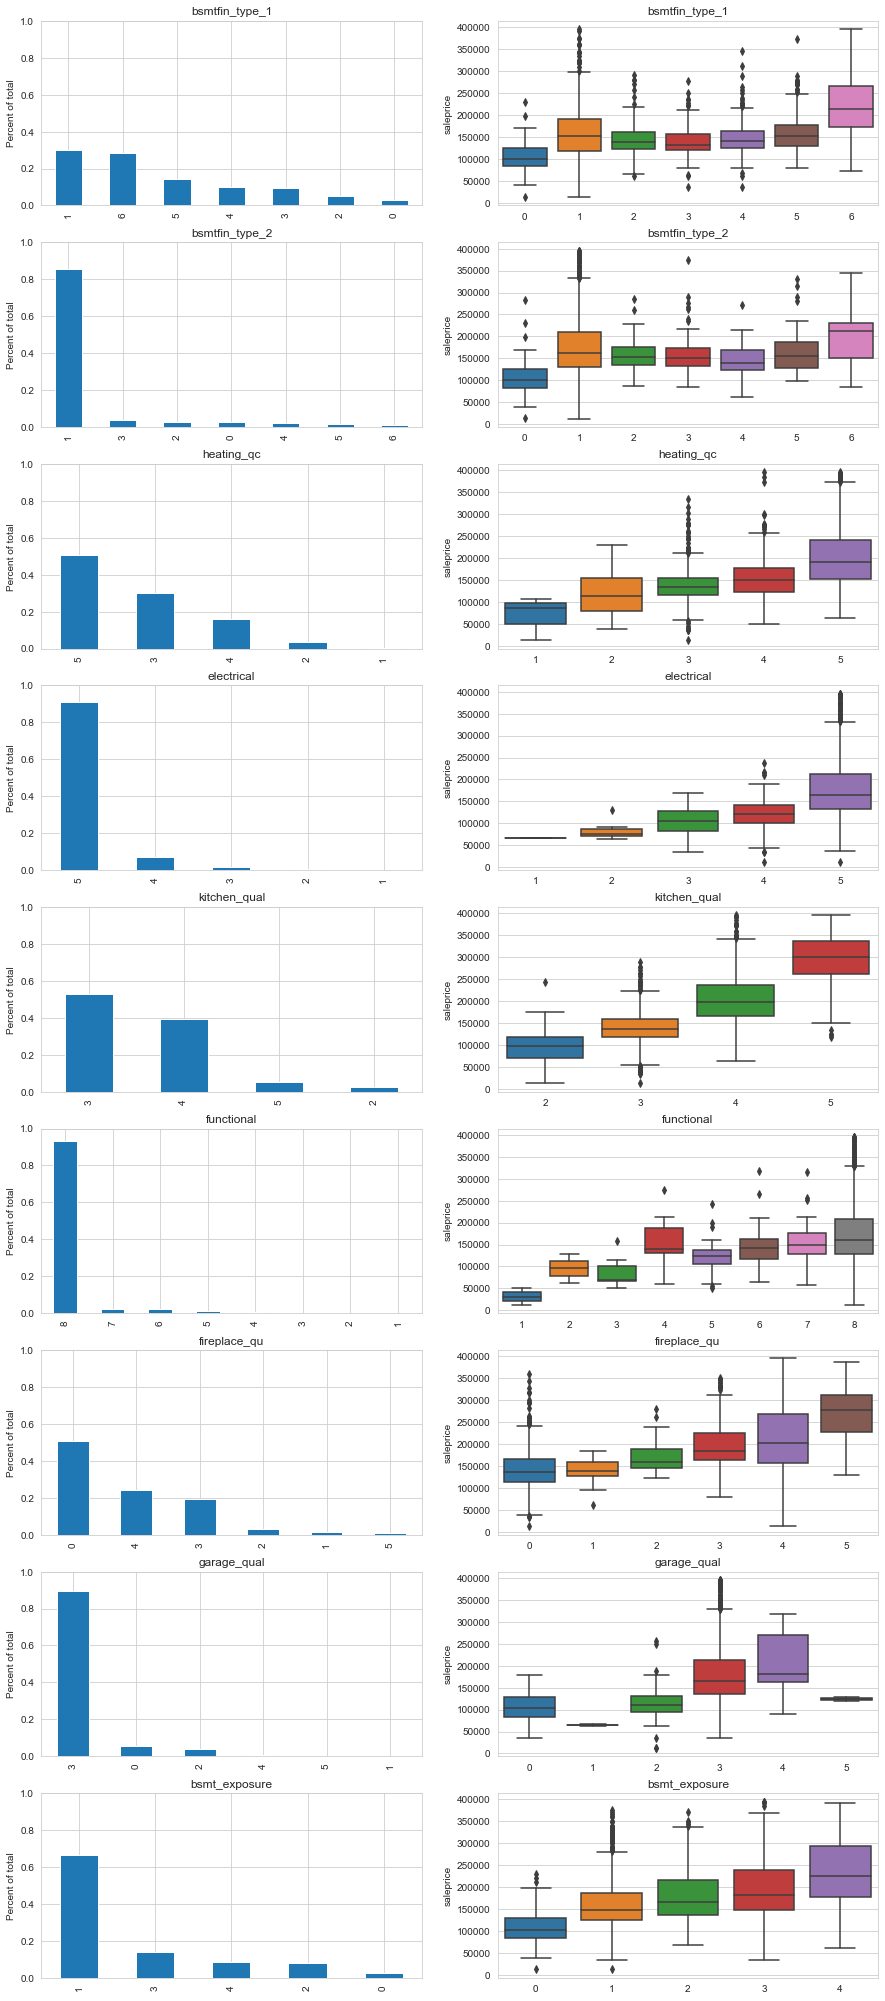

In [70]:
# Check features 10-18
mixplotter(ordinal_list[9:18]);

- Distribution of saleprice among `bsmtfin_type_1` codes is not varied, this is not a good feature for predicting saleprice.


- Majority (>80%) of values for `bsmtfin_type_2`, `electrical` and `functional` fall under one code, these features will not be good predictors of saleprice.


- Drop these ordinal features:


    a. bsmtfin_type_1
    b. bsmtfin_type_2
    c. electrical
    d. functional

In [71]:
# add to droplist
droplist.extend(['bsmtfin_type_1', 'bsmtfin_type_2', 'electrical', 'functional'])

#### Check ordinal features 19-27

<Figure size 432x288 with 0 Axes>

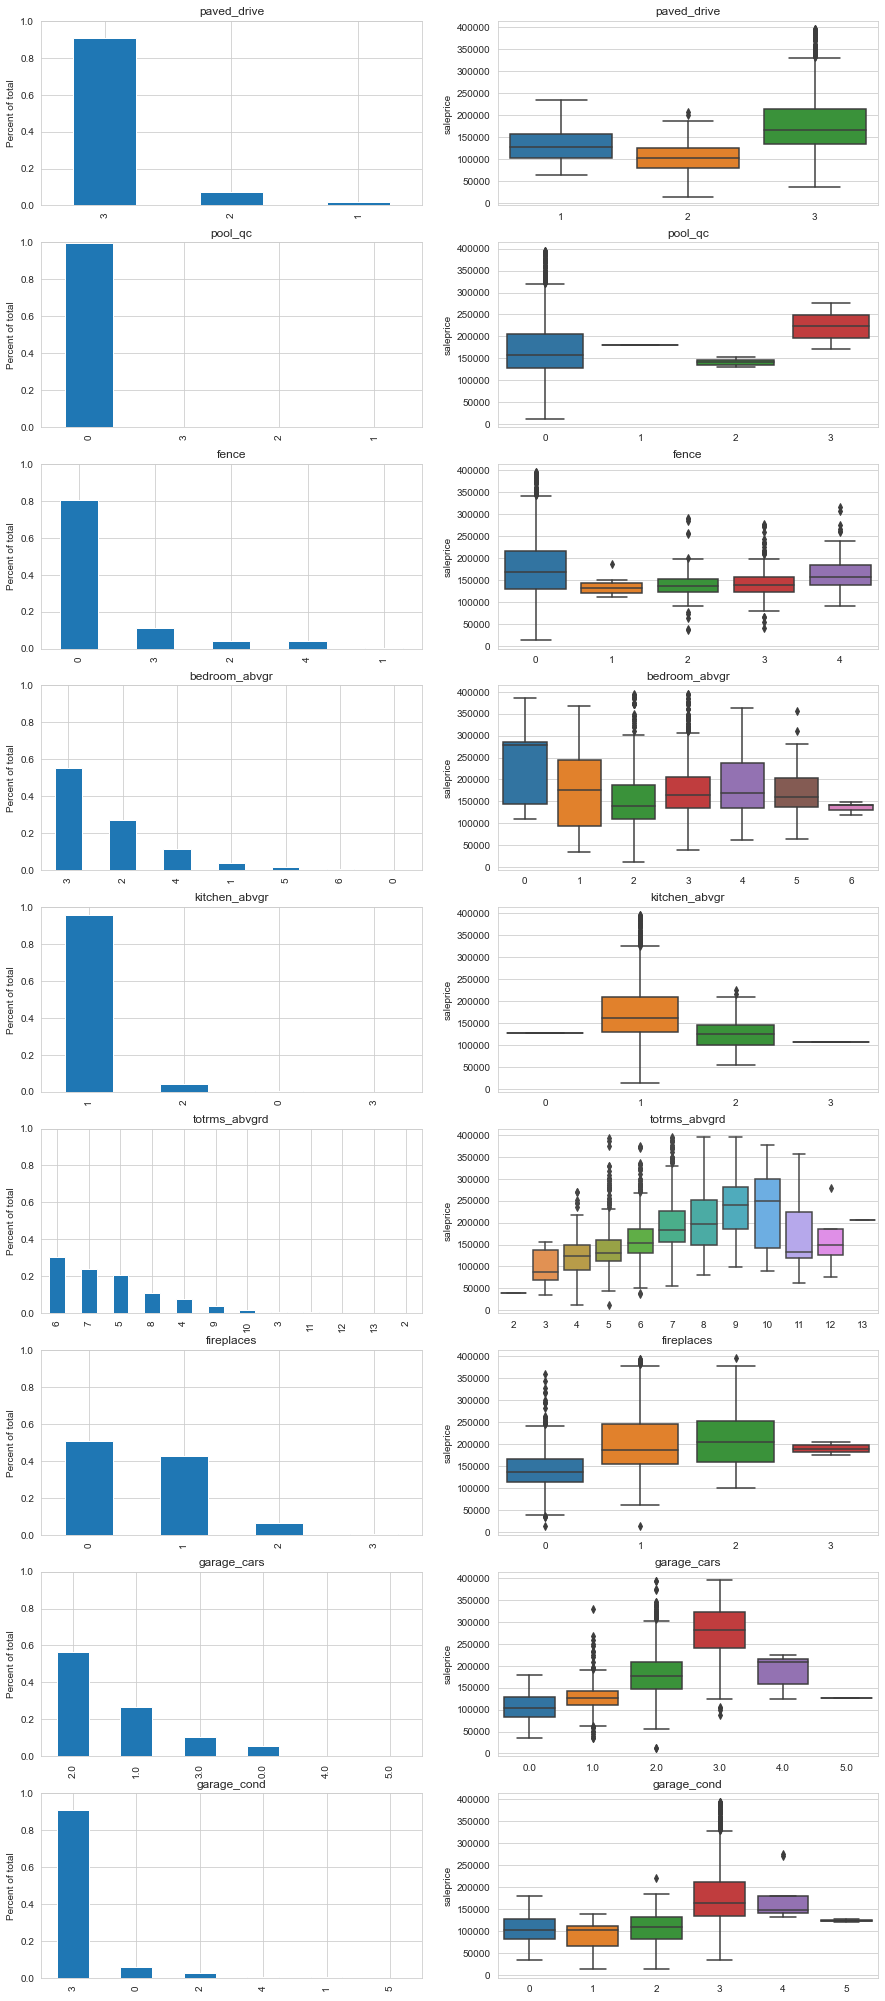

In [72]:
# Check features 19-27
mixplotter(ordinal_list[18:]);

- Distribution of saleprice among `fence` codes is not varied, this is not a good feature for predicting saleprice.


- Majority (>80%) of values for `paved_drive`, `pool_qc`, `fence`, `kitchen_abvgr` and `garage_cond` fall under one code, these features will not be good predictors of saleprice.


- Drop these ordinal features:


    a. paved_drive
    b. pool_qc
    c. fence
    d. kitchen_abvgr
    e. garage_cond

In [73]:
# add to droplist
droplist.extend(['paved_drive', 'pool_qc', 'fence', 'kitchen_abvgr', 'garage_cond'])

In [74]:
len(droplist)

41

38 features dropped so far.

### Check nominal features
[Back to Content](#Contents:)

In [75]:
len(nominal_list)

23

Total of 23 nominal features to explore.

Let's explore 11 features at a time.

#### Check nominal features 1 to 12

<Figure size 432x288 with 0 Axes>

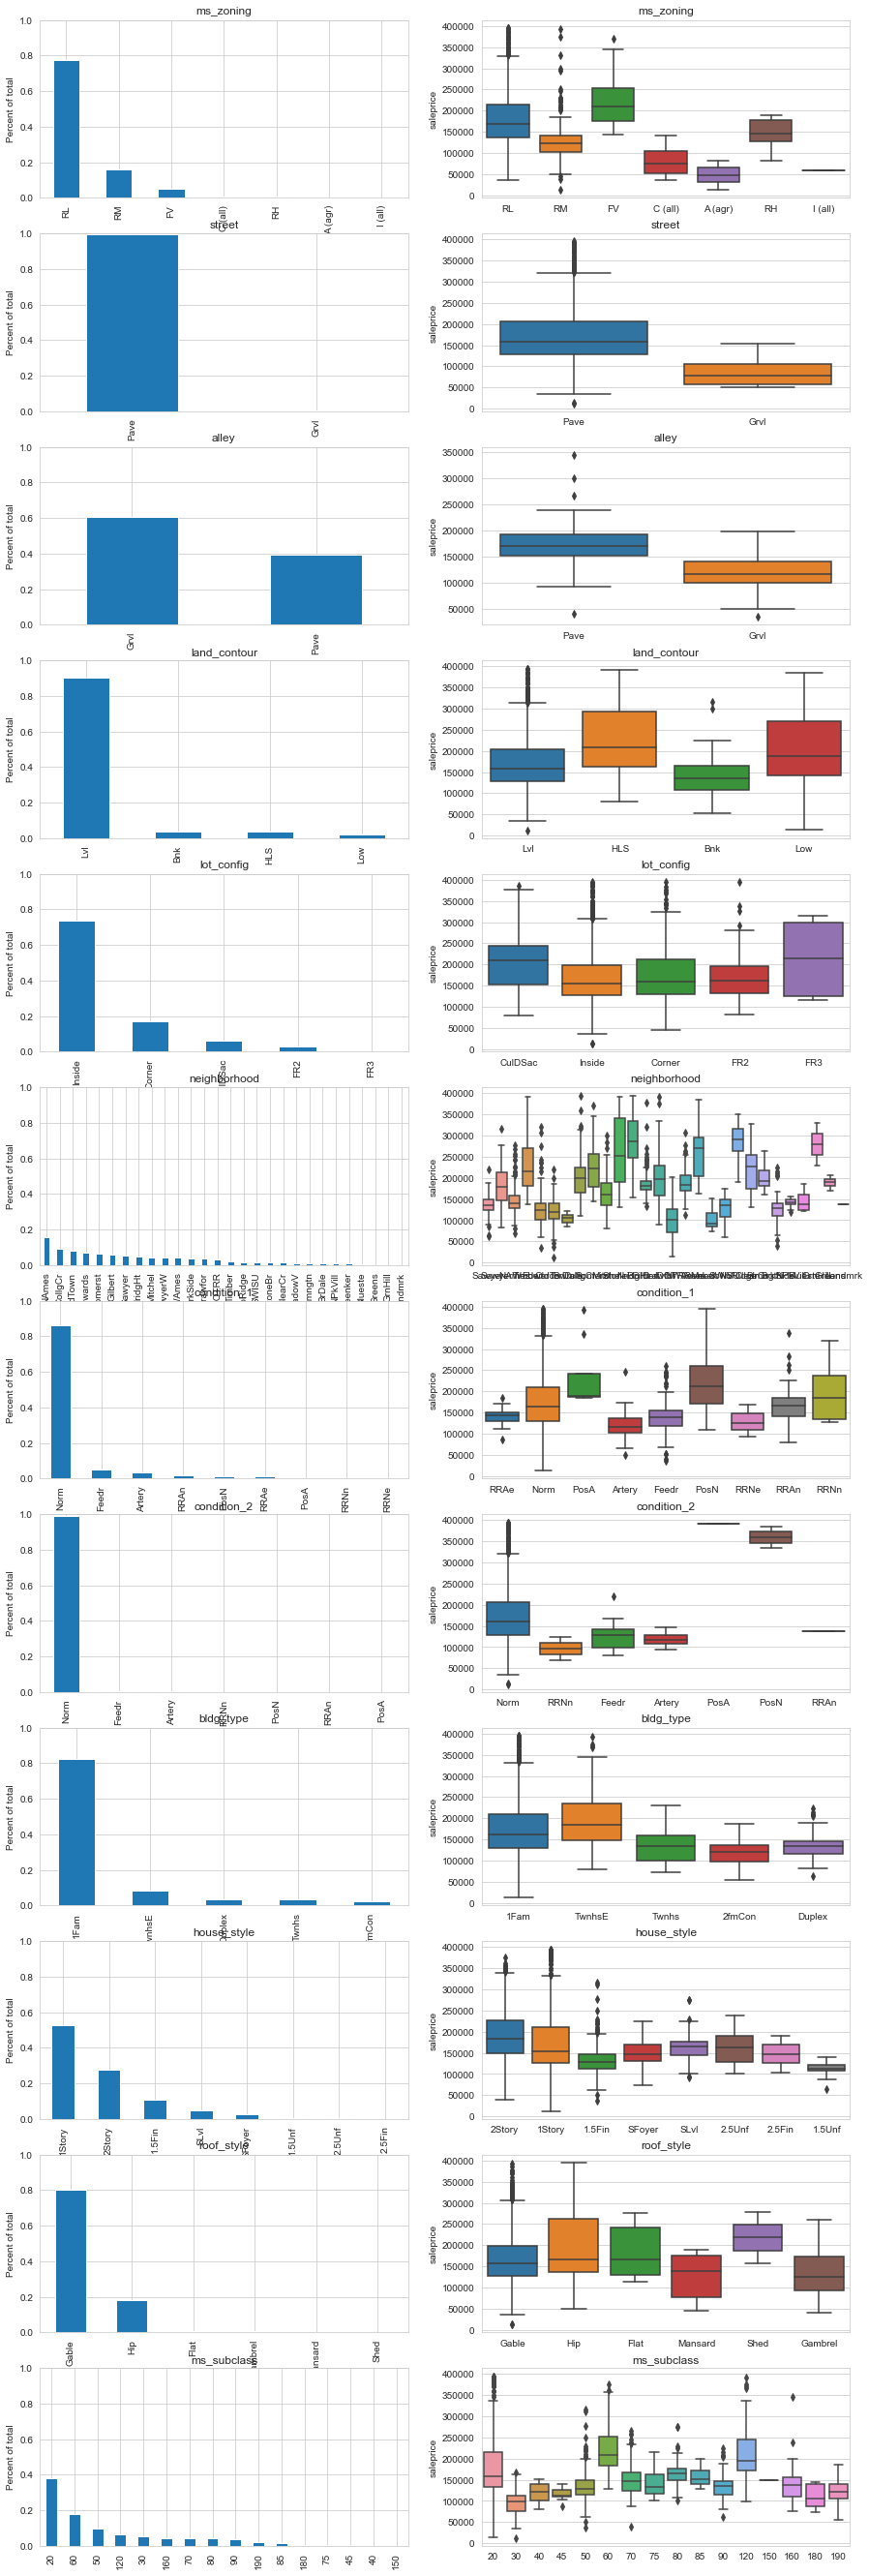

In [76]:
mixplotter(nominal_list[0:12]);

- Distribution of saleprice among `lot_config` codes is not varied, this is not a good feature for predicting saleprice.


- Majority (>80%) of values for `street`, `land_contour`, `condition_1`, `condition_2` and `bldg_type`  fall under one code, these features will not be good predictors of saleprice.


- Drop these ordinal features:


    a. lot_config
    b. street
    c. land_contour
    d. condition_1
    e. condition_2
    f. bldg_type

In [77]:
# add to droplist
droplist.extend(['lot_config','street','land_contour','condition_1','condition_2','bldg_type'])

<Figure size 432x288 with 0 Axes>

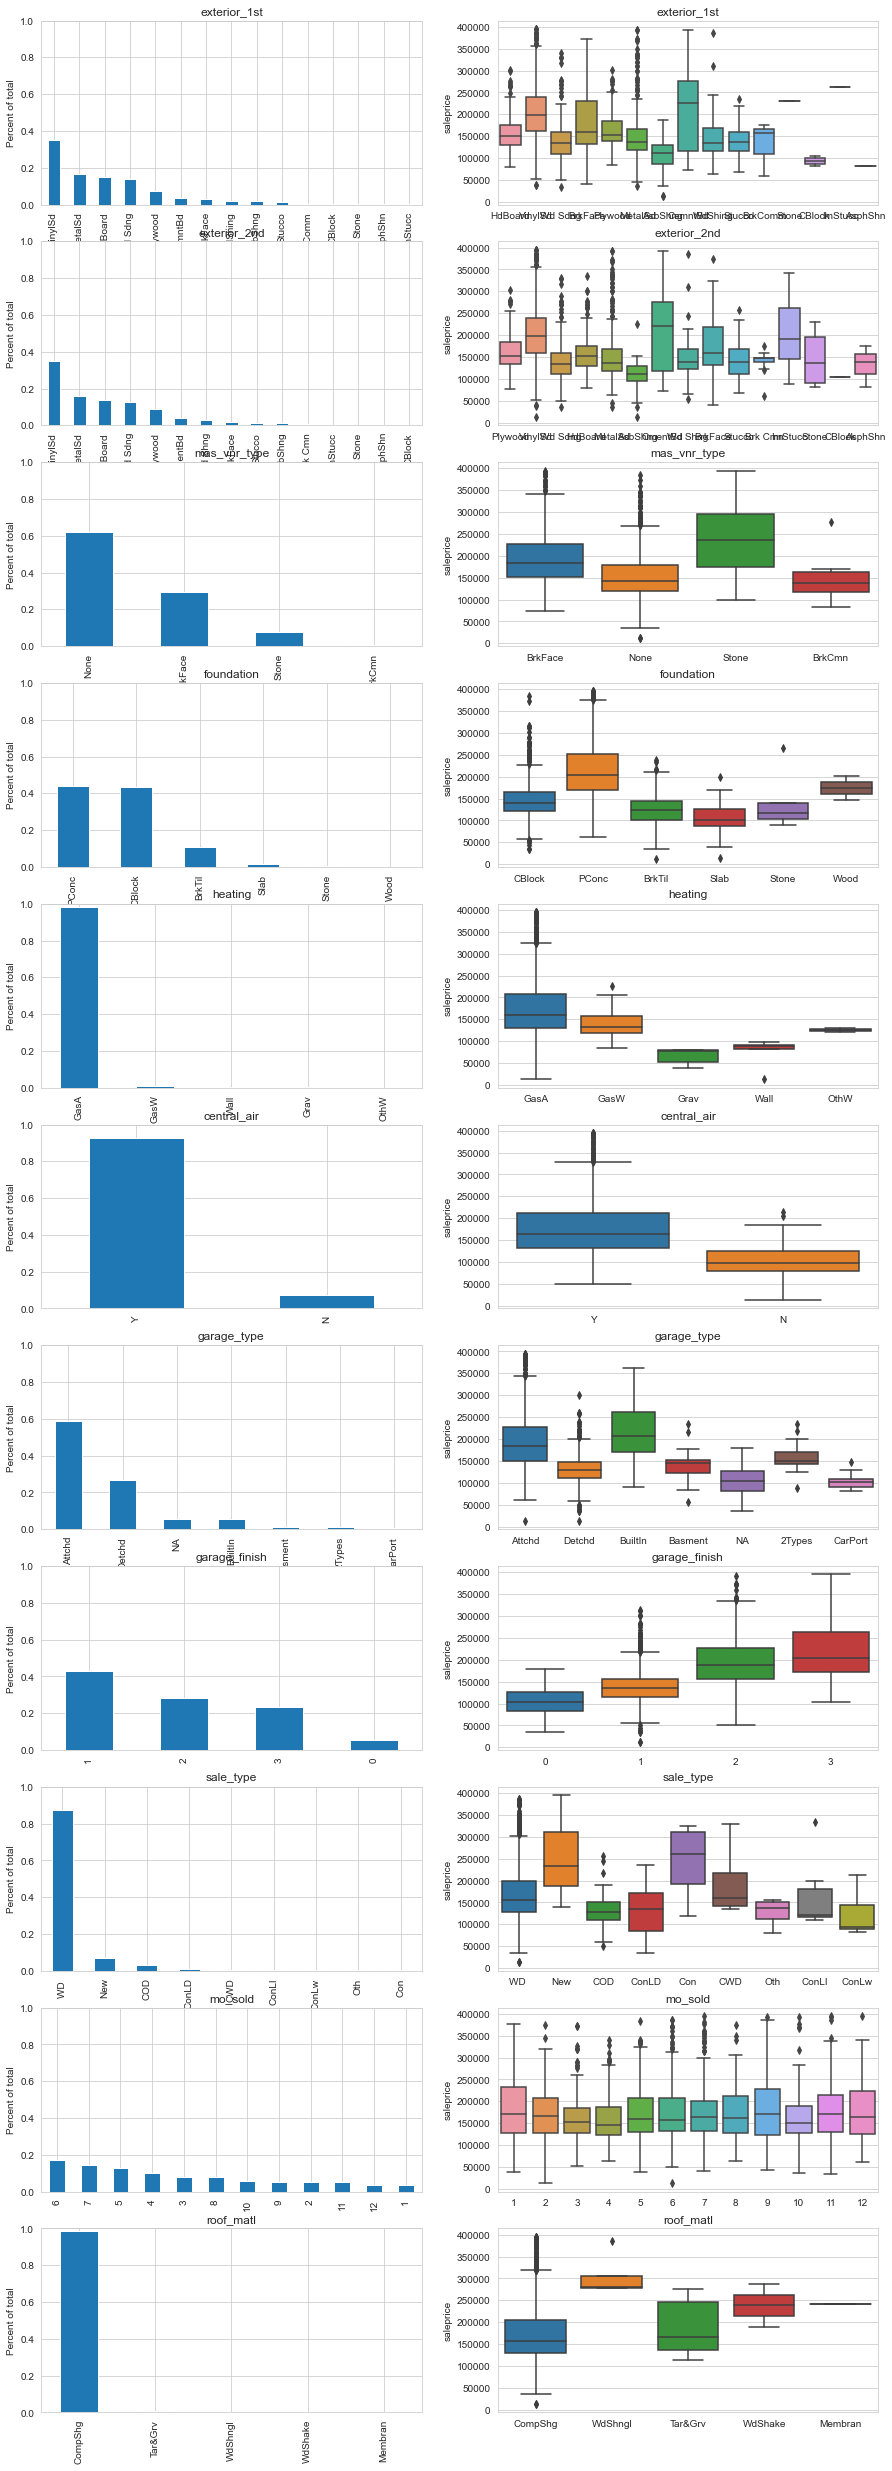

In [78]:
mixplotter(nominal_list[12:]);

- Distribution of saleprice among `mo_sold` codes is not varied, this is not a good feature for predicting saleprice.


- Majority (>80%) of values for `roof_matl`, `heating`, `central_air`, `sale_type` and `roof_style` fall under one code, these features will not be good predictors of saleprice.


- Drop these ordinal features:


    a. mo_sold
    b. roof_matl
    c. heating
    d. central_air
    e. sale_type
    f. roof_style

In [79]:
# add to droplist
droplist.extend(['mo_sold', 'roof_matl', 'heating', 'central_air', 'sale_type', 'roof_style'])

In [80]:
len(droplist), 53/77

(53, 0.6883116883116883)

Total of 53 out of 77 features or 69% of all features dropped.

## Feature engineering
[Back to Content](#Contents:)


Explore feature engineering using continuous features.

What are the features that can be considered for feature engineering?

In [81]:
feature_engr_list = [x for x in continuous_list if x not in droplist]
feature_engr_list

['total_bsmt_sf', 'gr_liv_area', 'garage_area', 'age_built']

Let's try out some polynomial features with these 4, with degree=2.

After trying out a few degrees from 2 to 5, 2 returned the best improvement in R2 and RMSE.

In [82]:
# Create training data set for polynomial feature
X_train_fe = train[feature_engr_list]
y = train['saleprice']

In [83]:
# Get score before using polynomial features
lr = LinearRegression()
cross_val_score(lr, X_train_fe, y, cv=5).mean()

0.7588954768719345

In [84]:
# Get RMSE before using polynomial features
np.sqrt(-cross_val_score(lr, X_train_fe, y, cv=5, scoring='neg_mean_squared_error').mean())

31672.148545849122

In [85]:
# Create a poly model with degree=2 and fit using the 4 continuous features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_fe_poly = poly.fit_transform(X_train_fe)

In [86]:
# Create new dataframe with returned polynomial features
poly_fe_train_df = pd.DataFrame(X_train_fe_poly, 
                                  columns=poly.get_feature_names(feature_engr_list),
                                  index=train.index)

In [87]:
poly_fe_train_df.head()

,total_bsmt_sf,gr_liv_area,garage_area,age_built,total_bsmt_sf^2,total_bsmt_sf gr_liv_area,total_bsmt_sf garage_area,total_bsmt_sf age_built,gr_liv_area^2,gr_liv_area garage_area,gr_liv_area age_built,garage_area^2,garage_area age_built,age_built^2
0,725.0,1479.0,475.0,35.0,525625.0,1072275.0,344375.0,25375.0,2187441.0,702525.0,51765.0,225625.0,16625.0,1225.0
1,913.0,2122.0,559.0,14.0,833569.0,1937386.0,510367.0,12782.0,4502884.0,1186198.0,29708.0,312481.0,7826.0,196.0
2,1057.0,1057.0,246.0,58.0,1117249.0,1117249.0,260022.0,61306.0,1117249.0,260022.0,61306.0,60516.0,14268.0,3364.0
3,384.0,1444.0,400.0,5.0,147456.0,554496.0,153600.0,1920.0,2085136.0,577600.0,7220.0,160000.0,2000.0,25.0
4,676.0,1445.0,484.0,111.0,456976.0,976820.0,327184.0,75036.0,2088025.0,699380.0,160395.0,234256.0,53724.0,12321.0


Total of 10 polynomial features created.

Does these new features improve the accuracy of the model?

In [88]:
cross_val_score(lr, X_train_fe_poly, y, cv=5).mean()

0.7979291036612418

In [89]:
np.sqrt(-cross_val_score(lr, X_train_fe_poly, y, cv=5, scoring='neg_mean_squared_error').mean())

28994.55800130603

Yes, with the polynomial features, using the LR model, test R2 and RMSE have improved. Both bias and variance are better optimized with the polynomial features.

- R2 increased from 0.7588 to 0.7979
- RMSE dropped from 31672 to 28994

Let's look at their pairplots.

In [90]:
poly_fe_train_df['saleprice'] = y

In [91]:
# Plot pairplots with continuous features
# sns.pairplot(poly_fe_train_df).savefig('./images/poly_pp')

<img src="./images/poly_pp.png">

In [92]:
poly_fe_train_df.drop(columns=['saleprice'], inplace=True)
poly_fe_train_df.head()

,total_bsmt_sf,gr_liv_area,garage_area,age_built,total_bsmt_sf^2,total_bsmt_sf gr_liv_area,total_bsmt_sf garage_area,total_bsmt_sf age_built,gr_liv_area^2,gr_liv_area garage_area,gr_liv_area age_built,garage_area^2,garage_area age_built,age_built^2
0,725.0,1479.0,475.0,35.0,525625.0,1072275.0,344375.0,25375.0,2187441.0,702525.0,51765.0,225625.0,16625.0,1225.0
1,913.0,2122.0,559.0,14.0,833569.0,1937386.0,510367.0,12782.0,4502884.0,1186198.0,29708.0,312481.0,7826.0,196.0
2,1057.0,1057.0,246.0,58.0,1117249.0,1117249.0,260022.0,61306.0,1117249.0,260022.0,61306.0,60516.0,14268.0,3364.0
3,384.0,1444.0,400.0,5.0,147456.0,554496.0,153600.0,1920.0,2085136.0,577600.0,7220.0,160000.0,2000.0,25.0
4,676.0,1445.0,484.0,111.0,456976.0,976820.0,327184.0,75036.0,2088025.0,699380.0,160395.0,234256.0,53724.0,12321.0


#### Update polynomial features into train data and drop the old features

In [93]:
# exclude first 4 columns of poly dataset which are already in train dataset
train = pd.concat([train, poly_fe_train_df.iloc[:,4:]], axis=1)
train.drop(columns=feature_engr_list, inplace=True)

In [94]:
train.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice,age_remod,age_garage,bsmt_bath,bath,total_bsmt_sf^2,total_bsmt_sf gr_liv_area,total_bsmt_sf garage_area,total_bsmt_sf age_built,gr_liv_area^2,gr_liv_area garage_area,gr_liv_area age_built,garage_area^2,garage_area age_built,age_built^2
0,109,533352170,60,RL,0.0,13517,Pave,NaN,3,Lvl,4,CulDSac,3,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,4,3,CBlock,3,3,1,6,533.0,1,0.0,192.0,GasA,5,Y,5,725,754,0,0.0,0.0,2,1,3,1,4,6,8,0,0,Attchd,1976.0,2,2.0,3,3,3,0,44,0,0,0,0,0,0,NaN,0,3,2010,WD,130500,6,35.0,0.0,5,525625.0,1072275.0,344375.0,25375.0,2187441.0,702525.0,51765.0,225625.0,16625.0,1225.0
1,544,531379050,60,RL,43.0,11492,Pave,NaN,3,Lvl,4,CulDSac,3,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,4,3,PConc,4,3,1,6,637.0,1,0.0,276.0,GasA,5,Y,5,913,1209,0,1.0,0.0,2,1,4,1,4,8,8,1,3,Attchd,1997.0,2,2.0,3,3,3,0,74,0,0,0,0,0,0,NaN,0,4,2009,WD,220000,13,13.0,2.0,5,833569.0,1937386.0,510367.0,12782.0,4502884.0,1186198.0,29708.0,312481.0,7826.0,196.0
2,153,535304180,20,RL,68.0,7922,Pave,NaN,4,Lvl,4,Inside,3,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,4,CBlock,3,3,1,6,731.0,1,0.0,326.0,GasA,3,Y,5,1057,0,0,1.0,0.0,1,0,3,1,4,5,8,0,0,Detchd,1953.0,1,1.0,3,3,3,0,52,0,0,0,0,0,0,NaN,0,1,2010,WD,109000,4,58.0,2.0,2,1117249.0,1117249.0,260022.0,61306.0,1117249.0,260022.0,61306.0,60516.0,14268.0,3364.0
3,318,916386060,60,RL,73.0,9802,Pave,NaN,4,Lvl,4,Inside,3,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,3,PConc,4,3,1,1,0.0,1,0.0,384.0,GasA,4,Y,5,744,700,0,0.0,0.0,2,1,3,1,3,7,8,0,0,BuiltIn,2007.0,3,2.0,3,3,3,100,0,0,0,0,0,0,0,NaN,0,4,2010,WD,174000,4,4.0,0.0,5,147456.0,554496.0,153600.0,1920.0,2085136.0,577600.0,7220.0,160000.0,2000.0,25.0
4,255,906425045,50,RL,82.0,14235,Pave,NaN,3,Lvl,4,Inside,3,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,3,3,PConc,2,4,1,1,0.0,1,0.0,676.0,GasA,3,Y,5,831,614,0,0.0,0.0,2,0,3,1,3,6,8,0,0,Detchd,1957.0,1,2.0,3,3,2,0,59,0,0,0,0,0,0,NaN,0,3,2010,WD,138500,18,54.0,0.0,4,456976.0,976820.0,327184.0,75036.0,2088025.0,699380.0,160395.0,234256.0,53724.0,12321.0


#### Create polynomial features for test dataset

In [95]:
# Create test data set for polynomial feature
X_test_fe = test[feature_engr_list]
X_test_fe_poly = poly.fit_transform(X_test_fe)
poly_fe_test_df = pd.DataFrame(X_test_fe_poly, 
                                  columns=poly.get_feature_names(feature_engr_list),
                                  index=test.index)

In [96]:
poly_fe_test_df.head()

,total_bsmt_sf,gr_liv_area,garage_area,age_built,total_bsmt_sf^2,total_bsmt_sf gr_liv_area,total_bsmt_sf garage_area,total_bsmt_sf age_built,gr_liv_area^2,gr_liv_area garage_area,gr_liv_area age_built,garage_area^2,garage_area age_built,age_built^2
0,1020.0,1928.0,440.0,97.0,1040400.0,1966560.0,448800.0,98940.0,3717184.0,848320.0,187016.0,193600.0,42680.0,9409.0
1,1967.0,1967.0,580.0,30.0,3869089.0,3869089.0,1140860.0,59010.0,3869089.0,1140860.0,59010.0,336400.0,17400.0,900.0
2,654.0,1496.0,426.0,1.0,427716.0,978384.0,278604.0,654.0,2238016.0,637296.0,1496.0,181476.0,426.0,1.0
3,968.0,968.0,480.0,85.0,937024.0,937024.0,464640.0,82280.0,937024.0,464640.0,82280.0,230400.0,40800.0,7225.0
4,1394.0,1394.0,514.0,47.0,1943236.0,1943236.0,716516.0,65518.0,1943236.0,716516.0,65518.0,264196.0,24158.0,2209.0


In [97]:
# exclude first 4 columns of poly dataset which are already in test dataset
test = pd.concat([test, poly_fe_test_df.iloc[:,4:]], axis=1)
test.drop(columns=feature_engr_list, inplace=True)

In [98]:
test.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,age_remod,age_garage,bsmt_bath,bath,total_bsmt_sf^2,total_bsmt_sf gr_liv_area,total_bsmt_sf garage_area,total_bsmt_sf age_built,gr_liv_area^2,gr_liv_area garage_area,gr_liv_area age_built,garage_area^2,garage_area age_built,age_built^2
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,4,Lvl,4,Inside,3,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,3,2,Stone,2,3,1,1,0,1,0,1020,GasA,4,N,2.0,908,1020,0,0,0,2,0,4,2,2,9,8,0,0,Detchd,1910.0,1,1,1,1,3,0,60,112,0,0,0,0,0,NaN,0,4,2006,WD,57,97.0,0,4,1040400.0,1966560.0,448800.0,98940.0,3717184.0,848320.0,187016.0,193600.0,42680.0,9409.0
1,2718,905108090,90,RL,0.0,9662,Pave,NaN,3,Lvl,4,Inside,3,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,3,3,CBlock,4,3,1,1,0,1,0,1967,GasA,3,Y,5.0,1967,0,0,0,0,2,0,6,2,3,10,8,0,0,Attchd,1977.0,3,2,3,3,3,170,0,0,0,0,0,0,0,NaN,0,8,2006,WD,30,30.0,0,4,3869089.0,3869089.0,1140860.0,59010.0,3869089.0,1140860.0,59010.0,336400.0,17400.0,900.0
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,3,Lvl,4,Inside,3,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,4,3,PConc,4,4,3,6,554,1,0,100,GasA,5,Y,5.0,664,832,0,1,0,2,1,3,1,4,7,8,1,4,Attchd,2006.0,2,2,3,3,3,100,24,0,0,0,0,0,0,NaN,0,9,2006,New,1,1.0,2,5,427716.0,978384.0,278604.0,654.0,2238016.0,637296.0,1496.0,181476.0,426.0,1.0
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,4,Lvl,4,Inside,3,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,4,3,CBlock,3,3,1,1,0,1,0,968,GasA,3,Y,5.0,968,0,0,0,0,1,0,2,1,3,5,8,0,0,Detchd,1935.0,1,2,2,3,2,0,0,184,0,0,0,0,0,NaN,0,7,2007,WD,2,73.0,0,2,937024.0,937024.0,464640.0,82280.0,937024.0,464640.0,82280.0,230400.0,40800.0,7225.0
4,625,535105100,20,RL,0.0,9500,Pave,NaN,3,Lvl,4,Inside,3,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,3,3,CBlock,4,3,1,4,609,1,0,785,GasA,4,Y,5.0,1394,0,0,1,0,1,1,3,1,3,6,8,2,4,Attchd,1963.0,2,2,3,3,3,0,76,0,0,185,0,0,0,NaN,0,7,2009,WD,47,47.0,2,3,1943236.0,1943236.0,716516.0,65518.0,1943236.0,716516.0,65518.0,264196.0,24158.0,2209.0


## Pre-processing

### One-hot encode categorical variables
[Back to Content](#Contents:)

In [99]:
# how many columns before one-hot-encoding
train.shape

(1955, 92)

In [100]:
# List of nominal features to be one hot encoded 
get_dummy_list = [x for x in nominal_list if x not in droplist]

In [101]:
# Update train dataset
train = pd.get_dummies(train, columns=get_dummy_list, drop_first=True)

In [102]:
# Update test dataset
test = pd.get_dummies(test, columns=get_dummy_list, drop_first=True)

In [103]:
# align the columns in test to train, fill in missing with 0
train, test = train.align(test, axis=1, fill_value=0, join='left')

In [104]:
train.shape, test.shape

((1955, 182), (879, 182))

Both the train and test data are now aligned. 

In [105]:
# add pid to the list of features to be dropped, keep id as it is needed for kaggle submission
droplist.extend(['pid'])

# get the final list of features for modeling
final_list = [x for x in train._get_numeric_data().columns.values if x not in droplist]

# create the new final datasets
train_final = train[final_list]
test_final = test[final_list]

# check the shape of the final train and test data
train_final.shape, test_final.shape

((1955, 128), (879, 128))

New datasets less the dropped features have been created.

Next, we will save the final train and test data to be used in modeling. 

In [106]:
train_final.to_csv('./datasets/train_final.csv', index=False)
test_final.to_csv('./datasets/test_final.csv', index=False)

[Continue to modeling](./part2_modeling.ipynb)